# My Capstone Project

# Cappadocia Venue Recommendation

## Introduction

_Cappadocia_ is one of the most visited touristic attraction points in Turkey which is known for its fairy chimneys, valleys covered with natural rock formations, historical monasteries, boutique hotels and hot air balloon tours.

Cappadocia region was formed 60 million years ago by erosion of soft layers of lava and ash from Mount Erciyes (Argeus), Mount Hasan and Mount Güllü composing with wind and rain over millions of years.It is a place where nature and history integrates. While geographical events created fairy chimneys – the people carved houses and churches inside these chimneys. Later on decorated them with frescoes in this historical process, bringing the traces of civilizations for thousands of years to present.

Due to its unique environment, the number of tourists visiting Cappadocia is increasing year by year. Cappadocia hosted over 2.2 million domestic and foreign tourists in 2017 and with a 33% increase rate it hosted over 2.9 million tourists in 2018.

The intention of this study is to recommend venues like hotels, museums, restaurants to visitors who are planning to visit the Cappadocia region according to FourSquare API venue recommendations with map visualizations.

## Data Section

The data used in study is provided by Foursquare location data. The data are grouped by landscape area. Data consists information about hotels, museums and restaurants which are visualized by maps.

The following information are retrieved:

Venue ID Venue Name Coordinates : Latitude and Longitude Category Name

Cappadocia Göreme Top Venue Recommendations from FourSquare API (FourSquare website: www.foursquare.com)

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.goreme.bel.tr/files/galeri/ana-sayfa-slayt/1.jpg")

## Methodology

### Import Libraries

In [2]:
import requests # to handle requests
import pandas as pd # for data analysis
import numpy as np # to handle data in a vectorized manner

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
    
#tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

### FourSquare Credentials

In [3]:
ClIENT_ID = 'NV2VQLWRRUQ5MZQTWEMDRK1BLPT2ICIL1GJ2YUWPC0E3ITDH' # your Foursquare ID
ClIENT_SECRET = '14YCVNHNCTQ1IBUV0W4E5CD1AIWD24NSCEBULP0V52TQKJMA' # your Foursquare Secret
VERSION = '20180604'
LIMIT =30
print('Your credentails:')
print('Foursquare_ID: ' + ClIENT_ID)
print('Foursquare_Secret:' + ClIENT_SECRET)

Your credentails:
Foursquare_ID: NV2VQLWRRUQ5MZQTWEMDRK1BLPT2ICIL1GJ2YUWPC0E3ITDH
Foursquare_Secret:14YCVNHNCTQ1IBUV0W4E5CD1AIWD24NSCEBULP0V52TQKJMA


### Göreme is one of the most visited regions of Cappadocia so Göreme's latitude and longtitude values are defined.

In [4]:
# define the city and get its latitude & longitude 
city = 'Goreme'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(city)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

38.642089 34.8296234


### Search for Hotels

In [5]:
# search for hotels
search_query = 'Hotel'
radius = 5000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'\
.format(ClIENT_ID, ClIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [6]:
url

'https://api.foursquare.com/v2/venues/search?client_id=NV2VQLWRRUQ5MZQTWEMDRK1BLPT2ICIL1GJ2YUWPC0E3ITDH&client_secret=14YCVNHNCTQ1IBUV0W4E5CD1AIWD24NSCEBULP0V52TQKJMA&ll=38.642089,34.8296234&v=20180604&query=Hotel&radius=5000&limit=30'

In [7]:
# Send the GET Request and examine the results
results = requests.get(url).json()
#results

In [8]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4bdf6491e75c0f47aa0ecb03,"Gaferli Mah, Göreme",TR,Nevşehir,Türkiye,NaN,237,"[Gaferli Mah, Göreme, 50180 Nevşehir, Türkiye]","[{'lng': 34.83234538336151, 'lat': 38.64227978...",38.642280,34.832345,NaN,50180,Nevşehir,Anatolian Houses Hotel,v-1560690111,87591732
1,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4bd845536a51ce728cbbde3f,Uzundere Cad No: 43,TR,Nevşehir,Türkiye,Göreme,419,"[Uzundere Cad No: 43 (Göreme), Nevşehir, Türkiye]","[{'lng': 34.82500880446809, 'lat': 38.64099479...",38.640995,34.825009,NaN,NaN,Nevşehir,Göreme Kaya Hotel,v-1560690111,87591734
2,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4cac1a4a36fa6dcb77dfdb78,Göreme,TR,Nevşehir,Türkiye,Masat Sokak,459,"[Göreme (Masat Sokak), 50180 Nevşehir, Türkiye]","[{'lng': 34.82437767703999, 'lat': 38.64259106...",38.642591,34.824378,NaN,50180,Nevşehir,Flintstones Cave Hotel,v-1560690111,NaN
3,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4c7813e693ef236a8107ab0f,Aydınlı Mah. Yavuz Sok. No:1 Göreme Merkez,TR,Nevşehir,Türkiye,NaN,344,"[Aydınlı Mah. Yavuz Sok. No:1 Göreme Merkez, 5...","[{'lng': 34.825666246343154, 'lat': 38.6418804...",38.641880,34.825666,NaN,50180,Nevşehir,Kelebek Special Cave Hotel,v-1560690111,NaN
4,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,53fb94a3498ed00f02cd01a8,Orta Mahalle,TR,Göreme Tarihi Milli Parkı,Türkiye,Ayvaz Efendi Sokak,452,"[Orta Mahalle (Ayvaz Efendi Sokak), 50180 Göre...","[{'lng': 34.82620066036932, 'lat': 38.64515535...",38.645155,34.826201,ORTA MAHALLE,50180,NaN,Cappadocia Inn Hotel,v-1560690111,93622108


Clean the Data to get the Hotel Names

In [9]:
# keep only columns that include venue name, and anything that is associated with location
clean_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')]+ ['id']
hotel_dataframe = dataframe.loc[:,clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
hotel_dataframe['categories'] = hotel_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
hotel_dataframe.columns = [column.split('.')[-1] for column in hotel_dataframe.columns]

hotel_dataframe.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Anatolian Houses Hotel,Hotel,"Gaferli Mah, Göreme",TR,Nevşehir,Türkiye,NaN,237,"[Gaferli Mah, Göreme, 50180 Nevşehir, Türkiye]","[{'lng': 34.83234538336151, 'lat': 38.64227978...",38.642280,34.832345,NaN,50180,Nevşehir,4bdf6491e75c0f47aa0ecb03
1,Göreme Kaya Hotel,Hotel,Uzundere Cad No: 43,TR,Nevşehir,Türkiye,Göreme,419,"[Uzundere Cad No: 43 (Göreme), Nevşehir, Türkiye]","[{'lng': 34.82500880446809, 'lat': 38.64099479...",38.640995,34.825009,NaN,NaN,Nevşehir,4bd845536a51ce728cbbde3f
2,Flintstones Cave Hotel,Hotel,Göreme,TR,Nevşehir,Türkiye,Masat Sokak,459,"[Göreme (Masat Sokak), 50180 Nevşehir, Türkiye]","[{'lng': 34.82437767703999, 'lat': 38.64259106...",38.642591,34.824378,NaN,50180,Nevşehir,4cac1a4a36fa6dcb77dfdb78
3,Kelebek Special Cave Hotel,Hotel,Aydınlı Mah. Yavuz Sok. No:1 Göreme Merkez,TR,Nevşehir,Türkiye,NaN,344,"[Aydınlı Mah. Yavuz Sok. No:1 Göreme Merkez, 5...","[{'lng': 34.825666246343154, 'lat': 38.6418804...",38.641880,34.825666,NaN,50180,Nevşehir,4c7813e693ef236a8107ab0f
4,Cappadocia Inn Hotel,Hotel,Orta Mahalle,TR,Göreme Tarihi Milli Parkı,Türkiye,Ayvaz Efendi Sokak,452,"[Orta Mahalle (Ayvaz Efendi Sokak), 50180 Göre...","[{'lng': 34.82620066036932, 'lat': 38.64515535...",38.645155,34.826201,ORTA MAHALLE,50180,NaN,53fb94a3498ed00f02cd01a8


In [10]:
# delete unnecessary columns
hotel_dataframe2= hotel_dataframe.drop(['categories','cc', 'city', 'country', 'crossStreet', 'distance', 'address',\
                                        'labeledLatLngs','postalCode', 'id','state', 'neighborhood'], axis=1)
hotel_dataframe2

,name,formattedAddress,lat,lng
0,Anatolian Houses Hotel,"[Gaferli Mah, Göreme, 50180 Nevşehir, Türkiye]",38.642280,34.832345
1,Göreme Kaya Hotel,"[Uzundere Cad No: 43 (Göreme), Nevşehir, Türkiye]",38.640995,34.825009
2,Flintstones Cave Hotel,"[Göreme (Masat Sokak), 50180 Nevşehir, Türkiye]",38.642591,34.824378
3,Kelebek Special Cave Hotel,"[Aydınlı Mah. Yavuz Sok. No:1 Göreme Merkez, 5...",38.641880,34.825666
4,Cappadocia Inn Hotel,"[Orta Mahalle (Ayvaz Efendi Sokak), 50180 Göre...",38.645155,34.826201
5,Village Cave House Hotel,"[Ünlü Sokak 18, Göreme Tarihi Milli Parkı, Tür...",38.641757,34.831525
6,Sarihan Cave Hotel,"[Gaferli Mah. Cevizler Sok. No:20, Goreme-Capp...",38.641880,34.831929
7,Traveller's Cave Hotel,"[Aydinli mahallesi gorceli sokak no:7, 50000 N...",38.639513,34.827461
8,Sato Cave Hotel,[Türkiye],38.641684,34.828315
9,Göreme Cave Palace Hotel,"[Kapadokya, Türkiye]",38.642413,34.827194


### Map of the Hotels in Göreme Region

In [11]:
# create Göreme hotels te map of Cappadocia using latitude and longitude values
map_hotels = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, formattedAddress, name in zip(hotel_dataframe2['lat'], hotel_dataframe2['lng'], hotel_dataframe2['formattedAddress'], hotel_dataframe2['name']):
    label = '{}, {}'.format(formattedAddress, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hotels)  
    
map_hotels


### Search for the nearest Museums

In [12]:
# search for Museums
search_query = 'Müzesi','kilise'
radius = 5000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'\
.format(ClIENT_ID, ClIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

"https://api.foursquare.com/v2/venues/search?client_id=NV2VQLWRRUQ5MZQTWEMDRK1BLPT2ICIL1GJ2YUWPC0E3ITDH&client_secret=14YCVNHNCTQ1IBUV0W4E5CD1AIWD24NSCEBULP0V52TQKJMA&ll=38.642089,34.8296234&v=20180604&query=('Müzesi', 'kilise')&radius=5000&limit=30"

In [13]:
# Send the GET Request and examine the results
presults = requests.get(url).json()
#presults

In [14]:
# assign relevant part of JSON to venues
venues = presults['response']['venues']

# tranform venues into a dataframe
museum_dataframe = json_normalize(venues)
museum_dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4bc42a09461576b07a957f32,Göreme Milli Parkı,TR,Nevşehir,Türkiye,NaN,1361,"[Göreme Milli Parkı, 50180 Nevşehir, Türkiye]",NaN,38.640302,34.845119,50180,Nevşehir,Göreme Açık Hava Müzesi,v-1560690112
1,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4d623a03d7206ea851b008f2,Zelve Yolu,TR,Aktepe,Türkiye,NaN,4234,"[Zelve Yolu, Aktepe, Türkiye]","[{'lng': 34.863530563069006, 'lat': 38.6693960...",38.669396,34.863531,NaN,Nevşehir,Zelve Açık Hava Müzesi,v-1560690112
2,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4eb693094901cef9d902718d,NaN,TR,Göreme Tarihi Milli Parkı,Türkiye,NaN,1303,"[Göreme Tarihi Milli Parkı, Türkiye]","[{'lng': 34.844558423806404, 'lat': 38.6410412...",38.641041,34.844558,NaN,Nevşehir,Tokalı Kilise,v-1560690112
3,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,5066ccd5e4b0913fe20afe5d,NaN,TR,NaN,Türkiye,NaN,971,[Türkiye],"[{'lng': 34.8407475742562, 'lat': 38.642892618...",38.642893,34.840748,NaN,NaN,Saklı Kilise,v-1560690112
4,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4db29f5e6e817f90df201c80,NaN,TR,Göreme Tarihi Milli Parkı,Türkiye,NaN,1488,"[Göreme Tarihi Milli Parkı, Türkiye]","[{'lng': 34.846247411103256, 'lat': 38.6389116...",38.638912,34.846247,NaN,Nevşehir,Çarıklı Kilise,v-1560690112


In [15]:
museum_dataframe2= museum_dataframe.drop(['location.crossStreet','location.city','categories', 'hasPerk','id','location.address', 'location.cc', 'location.country', \
                                        'location.distance','location.labeledLatLngs','location.postalCode', 'location.state', \
                                         'referralId'], axis=1)
museum_dataframe2

,location.formattedAddress,location.lat,location.lng,name
0,"[Göreme Milli Parkı, 50180 Nevşehir, Türkiye]",38.640302,34.845119,Göreme Açık Hava Müzesi
1,"[Zelve Yolu, Aktepe, Türkiye]",38.669396,34.863531,Zelve Açık Hava Müzesi
2,"[Göreme Tarihi Milli Parkı, Türkiye]",38.641041,34.844558,Tokalı Kilise
3,[Türkiye],38.642893,34.840748,Saklı Kilise
4,"[Göreme Tarihi Milli Parkı, Türkiye]",38.638912,34.846247,Çarıklı Kilise
5,"[50180 Göreme Belediyesi, Türkiye]",38.639540,34.844933,Elmali Kilise
6,[Türkiye],38.641172,34.830220,Göreme Haçlı Kilise
7,"[Göreme Açık Hava Müzesi, Göreme Tarihi Milli ...",38.638551,34.846021,Karanlık Kilise
8,"[Göreme Tarihi Milli Parkı, Türkiye]",38.642960,34.828777,Tokalı Kilise
9,"[Göreme Açık Hava Müzesi, Ürgüp, Türkiye]",38.638528,34.845307,Yılanlı Kilise


Put the "name" column to the first column

In [16]:
museum_dataframe2= museum_dataframe2[ ['name'] + [ col for col in museum_dataframe2 if col != 'name' ] ]

In [17]:
museum_dataframe3= museum_dataframe2.drop([8,10,13], axis=0)

In [18]:
museum_dataframe3

,name,location.formattedAddress,location.lat,location.lng
0,Göreme Açık Hava Müzesi,"[Göreme Milli Parkı, 50180 Nevşehir, Türkiye]",38.640302,34.845119
1,Zelve Açık Hava Müzesi,"[Zelve Yolu, Aktepe, Türkiye]",38.669396,34.863531
2,Tokalı Kilise,"[Göreme Tarihi Milli Parkı, Türkiye]",38.641041,34.844558
3,Saklı Kilise,[Türkiye],38.642893,34.840748
4,Çarıklı Kilise,"[Göreme Tarihi Milli Parkı, Türkiye]",38.638912,34.846247
5,Elmali Kilise,"[50180 Göreme Belediyesi, Türkiye]",38.639540,34.844933
6,Göreme Haçlı Kilise,[Türkiye],38.641172,34.830220
7,Karanlık Kilise,"[Göreme Açık Hava Müzesi, Göreme Tarihi Milli ...",38.638551,34.846021
9,Yılanlı Kilise,"[Göreme Açık Hava Müzesi, Ürgüp, Türkiye]",38.638528,34.845307
11,Elmalı Kilise,"[Göreme, Türkiye]",38.644102,34.831778


In [19]:
museum_dataframe3.rename(columns={'location.formattedAddress':'formattedAddress','location.lat':'lat','location.lng':'lng'}, inplace=True)

In [20]:
museum_dataframe3

,name,formattedAddress,lat,lng
0,Göreme Açık Hava Müzesi,"[Göreme Milli Parkı, 50180 Nevşehir, Türkiye]",38.640302,34.845119
1,Zelve Açık Hava Müzesi,"[Zelve Yolu, Aktepe, Türkiye]",38.669396,34.863531
2,Tokalı Kilise,"[Göreme Tarihi Milli Parkı, Türkiye]",38.641041,34.844558
3,Saklı Kilise,[Türkiye],38.642893,34.840748
4,Çarıklı Kilise,"[Göreme Tarihi Milli Parkı, Türkiye]",38.638912,34.846247
5,Elmali Kilise,"[50180 Göreme Belediyesi, Türkiye]",38.639540,34.844933
6,Göreme Haçlı Kilise,[Türkiye],38.641172,34.830220
7,Karanlık Kilise,"[Göreme Açık Hava Müzesi, Göreme Tarihi Milli ...",38.638551,34.846021
9,Yılanlı Kilise,"[Göreme Açık Hava Müzesi, Ürgüp, Türkiye]",38.638528,34.845307
11,Elmalı Kilise,"[Göreme, Türkiye]",38.644102,34.831778


### Map of the Museums 

In [21]:
# create museums map of Cappadocia using latitude and longitude values
map_museums = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for name,lat,lng  in zip(museum_dataframe3['name'], museum_dataframe3['lat'], museum_dataframe3['lng'] ):
    label = '{}, {}'.format(name,formattedAddress)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#9631cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_museums)  
    
map_museums

### Search for the Nearest Restaurants

In [22]:
# search for Restaurants
search_query = 'Restaurant',
radius = 5000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'\
.format(ClIENT_ID, ClIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

"https://api.foursquare.com/v2/venues/search?client_id=NV2VQLWRRUQ5MZQTWEMDRK1BLPT2ICIL1GJ2YUWPC0E3ITDH&client_secret=14YCVNHNCTQ1IBUV0W4E5CD1AIWD24NSCEBULP0V52TQKJMA&ll=38.642089,34.8296234&v=20180604&query=('Restaurant',)&radius=5000&limit=30"

In [23]:
# Send the GET Request and examine the results
presults = requests.get(url).json()
#presults

In [24]:
# assign relevant part of JSON to venues
venues = presults['response']['venues']

# tranform venues into a dataframe
resto_dataframe = json_normalize(venues)
resto_dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4c22570413c00f47635587de,Belediye Cd.,TR,Göreme Tarihi Milli Parkı,Türkiye,NaN,127,"[Belediye Cd., 50180 Göreme Tarihi Milli Parkı...","[{'lng': 34.82914050286126, 'lat': 38.64317509...",38.643175,34.829141,50180,Nevşehir,One Way Cafe Restaurant,v-1560690113,NaN
1,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,56e3f6b1498e8a4e8acbe205,Orta Aydınlı Mah. Milli Sk. Göreme,TR,Ürgüp,Türkiye,NaN,107,"[Orta Aydınlı Mah. Milli Sk. Göreme, Ürgüp, Tü...","[{'lng': 34.828677825033886, 'lat': 38.6427112...",38.642711,34.828678,NaN,Nevşehir,Viewpoint Cafe & Restaurant,v-1560690113,NaN
2,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,54f457ff498ea30870927516,Orta Mah.Uzun Dere Cad. No:9,TR,Göreme Tarihi Milli Parkı,Türkiye,NaN,201,"[Orta Mah.Uzun Dere Cad. No:9, 50180 Göreme Ta...","[{'lng': 34.8288882689091, 'lat': 38.643803072...",38.643803,34.828888,50180,Nevşehir,Şaziye Restaurant,v-1560690113,NaN
3,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,51eae36c498e9c7da2723ee8,NaN,TR,Nevşehir,Türkiye,NaN,97,"[50000 Nevşehir, Türkiye]","[{'lng': 34.82880514088845, 'lat': 38.64149580...",38.641496,34.828805,50000,Nevşehir,Cappadocia Pide House Restaurant,v-1560690113,NaN
4,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,510fe1ede4b0aaab99fce8c1,Orta Mah. Milli Sok. No: 6 Göreme,TR,Nevşehir,Türkiye,NaN,110,"[Orta Mah. Milli Sok. No: 6 Göreme, Nevşehir, ...","[{'lng': 34.82876129633173, 'lat': 38.64282096...",38.642821,34.828761,NaN,Nevşehir,My Mother's Cafe & Restaurant,v-1560690113,NaN


In [25]:
resto_dataframe2= resto_dataframe.drop(['location.city','location.crossStreet','categories', 'hasPerk','id','location.address', 'location.cc', 'location.country', \
                                        'location.distance','location.labeledLatLngs','location.postalCode', 'location.state', \
                                         'referralId','venuePage.id', ], axis=1)
resto_dataframe2

,location.formattedAddress,location.lat,location.lng,name
0,"[Belediye Cd., 50180 Göreme Tarihi Milli Parkı...",38.643175,34.829141,One Way Cafe Restaurant
1,"[Orta Aydınlı Mah. Milli Sk. Göreme, Ürgüp, Tü...",38.642711,34.828678,Viewpoint Cafe & Restaurant
2,"[Orta Mah.Uzun Dere Cad. No:9, 50180 Göreme Ta...",38.643803,34.828888,Şaziye Restaurant
3,"[50000 Nevşehir, Türkiye]",38.641496,34.828805,Cappadocia Pide House Restaurant
4,"[Orta Mah. Milli Sok. No: 6 Göreme, Nevşehir, ...",38.642821,34.828761,My Mother's Cafe & Restaurant
5,"[Goreme, Cappadocia, Türkiye]",38.643253,34.830709,Alaturka Restaurant
6,"[Hakkı Paşa Meydanı No: 1 Göreme (Kapadokya), ...",38.642551,34.829095,Dibek Cafe & Restaurant
7,"[Göreme Tarihi Milli Parkı, Türkiye]",38.641024,34.831573,Köy Evi Restaurant
8,"[Belediye Caddesi, El Sanatları Çarşısi, No 31...",38.643264,34.829287,Mozaik Restaurant
9,[Türkiye],38.643494,34.830290,Urizip Korean Restaurant


Put the "name" column to the first column

In [26]:
resto_dataframe2= resto_dataframe2[ ['name'] + [ col for col in resto_dataframe2 if col != 'name' ] ]

Rename the column names

In [27]:
resto_dataframe2.rename(columns={'location.formattedAddress':'formattedAddress','location.lat':'lat','location.lng':'lng'}, inplace=True)

In [28]:
resto_dataframe2

,name,formattedAddress,lat,lng
0,One Way Cafe Restaurant,"[Belediye Cd., 50180 Göreme Tarihi Milli Parkı...",38.643175,34.829141
1,Viewpoint Cafe & Restaurant,"[Orta Aydınlı Mah. Milli Sk. Göreme, Ürgüp, Tü...",38.642711,34.828678
2,Şaziye Restaurant,"[Orta Mah.Uzun Dere Cad. No:9, 50180 Göreme Ta...",38.643803,34.828888
3,Cappadocia Pide House Restaurant,"[50000 Nevşehir, Türkiye]",38.641496,34.828805
4,My Mother's Cafe & Restaurant,"[Orta Mah. Milli Sok. No: 6 Göreme, Nevşehir, ...",38.642821,34.828761
5,Alaturka Restaurant,"[Goreme, Cappadocia, Türkiye]",38.643253,34.830709
6,Dibek Cafe & Restaurant,"[Hakkı Paşa Meydanı No: 1 Göreme (Kapadokya), ...",38.642551,34.829095
7,Köy Evi Restaurant,"[Göreme Tarihi Milli Parkı, Türkiye]",38.641024,34.831573
8,Mozaik Restaurant,"[Belediye Caddesi, El Sanatları Çarşısi, No 31...",38.643264,34.829287
9,Urizip Korean Restaurant,[Türkiye],38.643494,34.830290


### Map of the Nearest Restaurants

In [29]:
# create restaurants map of Cappadocia using latitude and longitude values
map_resto = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to ma7
for name,lat,lng  in zip(resto_dataframe2['name'], resto_dataframe2['lat'], resto_dataframe2['lng'] ):
    label = '{}, {}'.format(name,formattedAddress)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ff0000',
        fill_opacity=0.7,
        parse_html=False).add_to(map_resto)  
    
map_resto

Define the categories for eachlist

In [30]:
resto_dataframe3 = resto_dataframe2.assign(Category = 'Restaurant')

In [31]:
museum_dataframe4 = museum_dataframe3.assign(Category = 'Museum')

In [32]:
hotel_dataframe3 = hotel_dataframe2.assign(Category = 'Hotel')

### Merged Table of Venues

In [33]:
df_new = pd.concat([museum_dataframe4,hotel_dataframe3,resto_dataframe3])
df_new.shape

(87, 5)

### Apply K- means algorithm to cluster venues according to geographical coordinates and find the optimum cluster for accomodation

In [34]:
X = df_new.iloc[:,[2,3]].values

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [36]:
wcss = []
cluster_number_list = range(1, 7)
for i in cluster_number_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

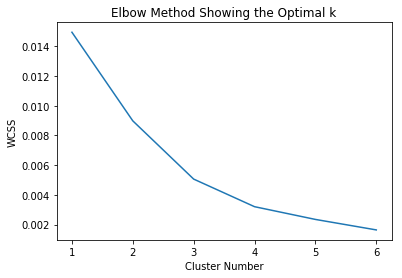

In [37]:
plt.plot(cluster_number_list, wcss)
plt.title('Elbow Method Showing the Optimal k')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

Elbow Method shows that the degree '3' is optimum for the K-Means.

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

## Results

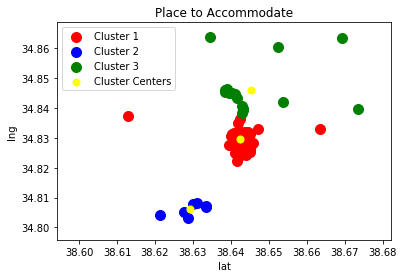

In [39]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Cluster Centers')
plt.title('Place to Accommodate')
plt.xlabel('lat')
plt.ylabel('lng')
plt.legend()
plt.show()

## Discussion

Cappadocia is a region spreading an area covering the provinces particularly to Nevsehir, Kirsehir, Nigde, Aksaray and Kayseri. The region nowadays has a great importance in terms of Tourism. 
The main worthseeing places are Ürgüp, Avanos, Göreme, Akvadi, Uçhisar and Ortahisar Castles, Güvercinlik Valley, Derinkuyu, Kaymaklı, Özkonak underground cities, Ihlara Valley,  Çavuşin, Güllüdere Valley.
In this study I mainly focused on the Göreme region but the study can be expanded including the above regions and attraction points. As there is such variety, different approaches can be tried in clustering and classification studies. 
I used the Kmeans algorithm as a machine learning method. When I tested the Elbow method, I set the optimum k value to 3. However, if the study is expanded to other regions and attraction points, other clustering methods can be preffered.
 In this study to recommend the best cluster to accommodate I cluster the areas according to geographical proximity. Other data like prices of the hotels and ratings can also be analyzed together to gain a better insight.


## Conclusion

Cappadocia is one of the most visited touristic attraction points in Turkey which is known for its fairy chimneys, natural rock formations, historical monasteries, boutique hotels, hot air balloon tours and now it is very popular destination with a growing amount of visitors each year.
In this study, according to FourSquare API venue recommendations I listed the tables of hotels, museums, restaurants in the Göreme region and visualized the map of these venues. Then I merged all the tables into a single table and used K-means clustering algorithm as a machine learning method to cluster the venues according the distances between the venues. I  defined centroids of the clusters and found that Cluster 3 will be the best choice to accommodate.
This kind of data analysis will be useful not only for tourists visiting a city for the first time but also for tourism agencies to inform & recommend their customers about the city and also for investors to invest in the city for new opportunities.
